In [6]:
import numpy as np
import pandas as pd

# for plotting the heatmap
import matplotlib.pyplot as plt

# recommendation
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler

print(pd. __version__)

1.5.3


In [7]:
import psycopg2
# Establish connection
conn = psycopg2.connect(dbname="postgres", user="postgres", password="postgres", host="localhost", port="5432")

# SQL query
query = """
    SELECT id, model_year, make, car_model, vehicle_class, engine_size, cylinders, transmission,
           fuel_type, city, highway, combined, combined_mpg, "CO2_Emission",
           motor, "city_kWh", "highway_kWh", "combined_kWh", range, recharge_time, 
           fuel_type2, range2, "combined_PHEV", vehicle_type
    FROM datamining_carinfomodel;
"""
#    WHERE model_year > 2015;

#df = pd.read_csv("../data/Conventional/MY2015-2019 Fuel Consumption Ratings.csv")
df = pd.read_sql_query(query, conn)

# Store the row IDs separately for future reference if needed
# original_row_ids = df['id']

C:\Users\nayeem\AppData\Local\Temp\ipykernel_10668\3447587748.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [8]:
# # check null
# df.isnull().sum()

# # check rows
# df.shape

# # check duplicate values
# duplicated_rows = df.duplicated(subset = df.columns[1:])

# # Display rows with duplicated values
# print(df.columns[1:])
# print(duplicated_rows)

In [9]:
# # Find correlation matrix
# import seaborn as sns

# # df_n = df.mode(numeric_only=True, dropna=True)

# correlation_matrix = df.corr()

# # Plot correlation matrix as a heatmap
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix')
# plt.ylabel('Variables')
# # TODO figure out text in th cells
# # c = plt.pcolor(correlation_matrix, edgecolors='k', linewidths=4, cmap='RdBu', vmin=0.0, vmax=1.0)
# # plt.colorbar(c)
# plt.show()

In [10]:
from sklearn.preprocessing import MinMaxScaler

transforemer = pd.get_dummies(df)
# List of attributes to be scaled
attributes_to_scale = ['engine_size', 'cylinders', 'city', 'highway', 'combined', 'combined_mpg','motor', 'city_kWh', 'highway_kWh', 'combined_kWh','range','range2', 'recharge_time', 'CO2_Emission']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the specified attributes
transforemer[attributes_to_scale] = scaler.fit_transform(transforemer[attributes_to_scale])

transforemer.fillna(0, inplace=True)

# print(transforemer.head(10))

In [11]:
# SPIDER chart try older one direct from scalled data

def plot_radar_chart(car1_id, car2_id, data):
    car1_whole_data = df[df['id'] == car1_id]
    car2_whole_data = df[df['id'] == car2_id]

    print(f" car 1 : {car1_whole_data}")
    print(f" car 2 : {car2_whole_data}")

    vehicle_type_car1 = car1_whole_data.at[car1_whole_data.index[0], 'vehicle_type']
    vehicle_type_car2 = car2_whole_data.at[car2_whole_data.index[0], 'vehicle_type']

    # When car1 -> convetional; car2 -> (should be) convetional or hybrid
    # When car1 -> hybrid; car2 -> (should be) hybrid or EV
    # When car1 -> EV; car2 -> (should be) EV
    
    attributes = [];
    if (vehicle_type_car1=="Conventional"):
        attributes = ['engine_size' ,'cylinders' , 'city' , 'highway' ,'combined' , 'combined_mpg' , 'CO2_Emission']
    elif (vehicle_type_car1=="BEV"):
        attributes = ['motor', 'range','city_kWh', 'highway_kWh', 'CO2_Emission', 'combined_kWh', 'recharge_time']
    elif (vehicle_type_car1=="PHEV"):
        if (vehicle_type_car2=="PHEV"):
            attributes = ['engine_size','cylinders','city','highway','combined','motor','range', 'recharge_time','range2', 'CO2_Emission']
        elif (vehicle_type_car2=="BEV"):
            attributes = ['motor','range', 'recharge_time','CO2_Emission']

    print(attributes)

    # Get data for car1 and car2
    car1_data = transforemer[transforemer.id == car1_id][attributes].iloc[0]
    car2_data = transforemer[transforemer.id == car2_id][attributes].iloc[0]

    # print(car1_data)
    # print(car2_data)

    # Radar chart attributes
    labels = np.array(attributes)
    num_vars = len(labels)

    # Compute angle for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # Complete the loop
    car1_data = np.concatenate((car1_data,[car1_data[0]]))
    car2_data = np.concatenate((car2_data,[car2_data[0]]))
    angles += angles[:1]

    # Plot
    fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))

    ax.fill(angles, car1_data, color='red', alpha=0.25, label=f'Car {car1_id}')
    ax.fill(angles, car2_data, color='blue', alpha=0.25, label=f'Car {car2_id}')

    # Add legend
    ax.legend(loc='upper right', fontsize='medium')

    # Add labels
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(attributes)


    # Setting range for the radar chart
    ax.set_ylim(0, max(max(car1_data), max(car2_data)) * 1.1)

    # Adding title
    plt.title(f'Comparison between {car1_whole_data["make"]} {car1_whole_data["car_model"]} and {car2_whole_data["make"]} {car2_whole_data["car_model"]}', size=20, color='black', y=1.1)


    # Improve aesthetics
    plt.grid(True, linestyle='--', linewidth=0.5)

    plt.show()

 car 1 :           id  model_year    make car_model vehicle_class  engine_size  \
21999  22000        2017  Toyota   Corolla      Mid-size          1.8   

       cylinders transmission fuel_type  city  ...  motor  city_kWh  \
21999        4.0           AV         X   8.3  ...    NaN       NaN   

       highway_kWh  combined_kWh  range  recharge_time  fuel_type2  range2  \
21999          NaN           NaN    NaN            NaN        None     NaN   

       combined_PHEV  vehicle_type  
21999           None  Conventional  

[1 rows x 24 columns]
 car 2 :           id  model_year     make car_model vehicle_class  engine_size  \
22999  23000        2018  Porsche   911 GT3    Two-seater          4.0   

       cylinders transmission fuel_type  city  ...  motor  city_kWh  \
22999        6.0           M6         Z  18.0  ...    NaN       NaN   

       highway_kWh  combined_kWh  range  recharge_time  fuel_type2  range2  \
22999          NaN           NaN    NaN            NaN        None  

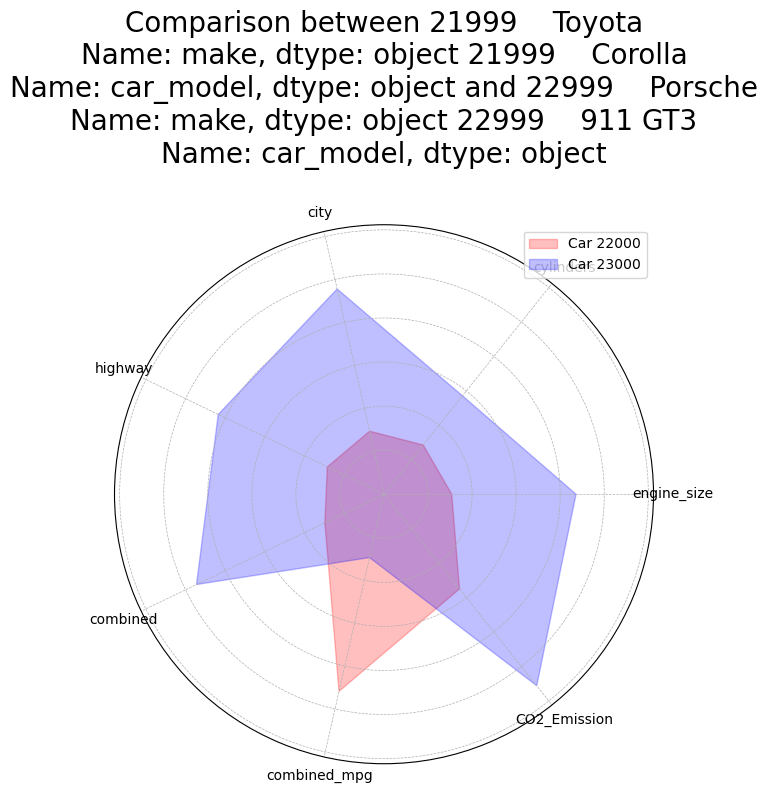

In [14]:
# Example usage
# Assuming 'data' is a DataFrame containing the necessary information
# Replace 'data' with your actual DataFrame name
# Replace 'car1_id' and 'car2_id' with the IDs of the cars you want to compare

# conventional vs conventional
# plot_radar_chart(22000, 23000, transforemer)

# conventional vs hybrid
# plot_radar_chart(2000, 750, transforemer)

# hybrid vs hybrid
# plot_radar_chart(750, 930, transforemer)

# hybrid vs EV
# plot_radar_chart(750, 450, transforemer)

In [29]:
# ouput CSV ->
df.to_csv('merged_v1.csv', index=False) 

In [91]:
###### DATA VISULAIZATION

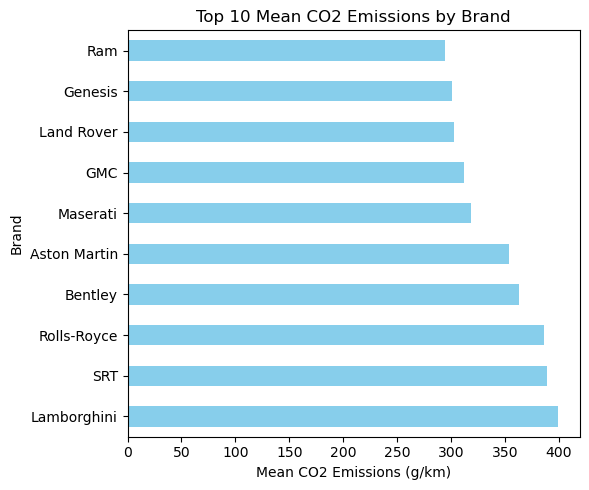

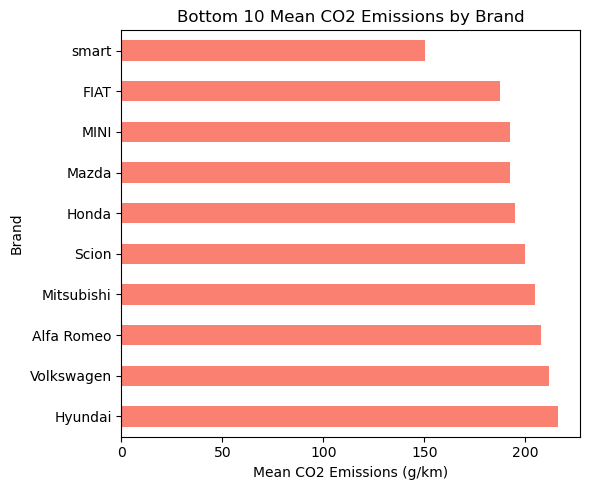

In [85]:
# First, let's calculate the mean CO2 emissions brand-wise
mean_co2_by_brand = df.groupby('make')['CO2_Emission'].mean()

# Now, let's sort the mean CO2 emissions in descending order
sorted_mean_co2 = mean_co2_by_brand.sort_values(ascending=False)

top_10 = sorted_mean_co2.head(10)
bottom_10 = sorted_mean_co2.tail(10)

# Plotting the horizontal bar graph for top 10
plt.figure(figsize=(6, 5))  # Set the figure size
top_10.plot(kind='barh', color='skyblue')  # Plotting the horizontal bar graph
plt.title('Top 10 Mean CO2 Emissions by Brand')
plt.xlabel('Mean CO2 Emissions (g/km)')
plt.ylabel('Brand')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()  # Show the plot

# Plotting the horizontal bar graph for bottom 10
plt.figure(figsize=(6, 5))  # Set the figure size
bottom_10.plot(kind='barh', color='salmon')  # Plotting the horizontal bar graph
plt.title('Bottom 10 Mean CO2 Emissions by Brand')
plt.xlabel('Mean CO2 Emissions (g/km)')
plt.ylabel('Brand')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()  # Show the plot

In [ ]:
# Group by 'Fuel type' and 'Model year', then calculate the average CO2 emissions
co2_emission_yearly = df.groupby(['fuel_type', 'model_year'])['CO2_Emission'].mean().reset_index()

# TODO think about the fuel_type_2

# Map fuel type codes to labels
fuel_type_labels = {'X': 'Regular gasoline', 'Z': 'Premium gasoline', 'D': 'Diesel', 'E': 'E85', 'N': 'Natural Gas'}
co2_emission_yearly['Fuel type'] = co2_emission_yearly['Fuel type'].map(fuel_type_labels)

# Pivot the DataFrame to have 'Fuel type' as columns
co2_emission_yearly_pivot = co2_emission_yearly.pivot(index='Model year', columns='Fuel type', values='CO2 emissions (g/km)')

# Plot the data
co2_emission_yearly_pivot.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Average CO2 Emissions by Fuel Type and Year')
plt.xlabel('Model Year')
plt.ylabel('Average CO2 Emissions (g/km)')
# plt.grid(True)
plt.legend(title='Fuel Type')
plt.tight_layout()
plt.show()

NameError: name 'data' is not defined